In [46]:
from qiskit_algorithms.utils import algorithm_globals
from sklearn import datasets
from sklearn.model_selection import train_test_split
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap, ZFeatureMap, TwoLocal, EfficientSU2
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
import numpy as np
from matplotlib import pyplot as plt
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import BlueprintCircuit
from qiskit.circuit import Parameter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from qiskit.circuit.library import RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import VQC

In [47]:
algorithm_globals.random_seed = 13

#select which class and features to use
class1 = 0
class2 = 1
feature1 = 0
feature2 = 1

iris = datasets.load_iris()

X = iris.data[:, [feature1, feature2]]
y = iris.target

X = X[np.logical_or(y == class1, y == class2)]
y = y[np.logical_or(y == class1, y == class2)]

X = MinMaxScaler(feature_range=(0, np.pi)).fit_transform(X) #seems to have better resuults if compatible with the rotation encoding

feature_dimension = X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

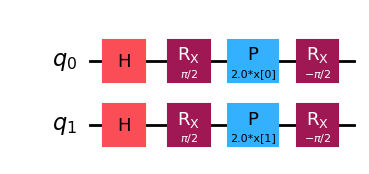

In [48]:
feature_map = PauliFeatureMap(feature_dimension=feature_dimension, reps=1, paulis=['Y'])
feature_map.decompose().draw('mpl')

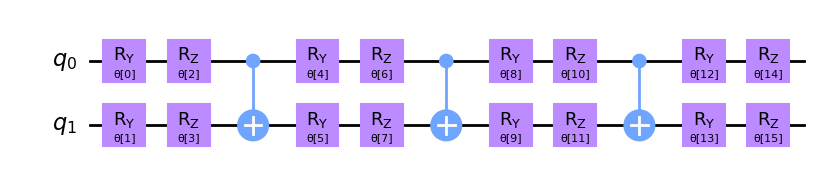

In [51]:
ansatz = EfficientSU2(num_qubits=feature_dimension, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

In [52]:
optimizer = COBYLA(maxiter=100)
sampler = Sampler()

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer
)

Accuracy:  0.9


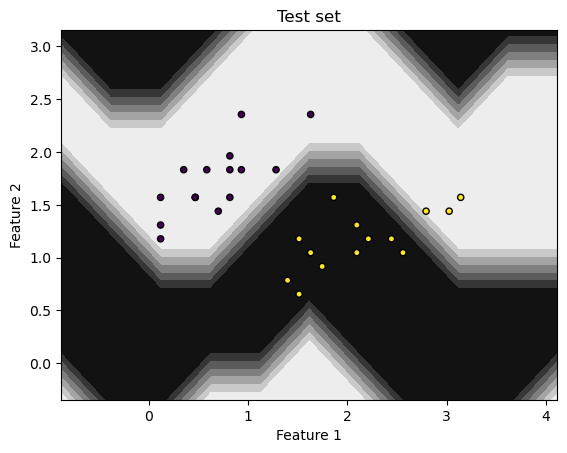

In [53]:
#fit classical SVM
vqc.fit(X_train, y_train)

print('Accuracy: ', vqc.score(X_test, y_test))

#plot decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))
Z = vqc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='binary')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, edgecolor='k')
plt.xlabel(f'Feature {feature1+1}')
plt.ylabel(f'Feature {feature2+1}')
plt.title('Test set')
plt.show()

In [12]:
algorithm_globals.random_seed = 13

iris = datasets.load_iris()

X = iris.data
y = iris.target

feature_dimension = X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

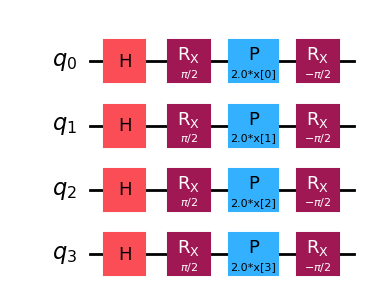

In [13]:
feature_map = PauliFeatureMap(feature_dimension=feature_dimension, reps=1, paulis=['Y'])
feature_map.decompose().draw('mpl')

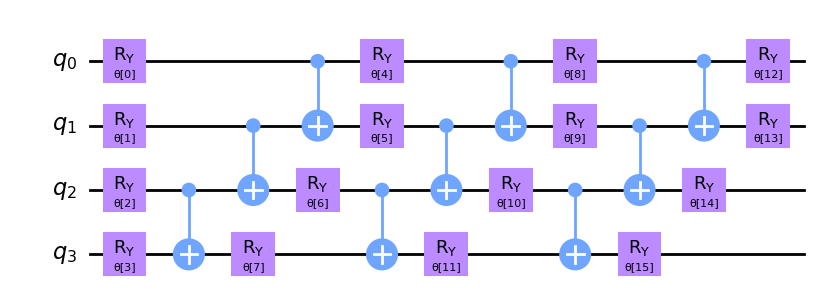

In [14]:
ansatz = RealAmplitudes(num_qubits=feature_dimension, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

In [15]:
optimizer = COBYLA(maxiter=100)
sampler = Sampler()

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer
)

In [17]:
#fit classical SVM
vqc.fit(X_train, y_train)

print('Accuracy: ', vqc.score(X_test, y_test))

Accuracy:  0.9111111111111111


We can also do a PCA to reduce the number of features and visualise the result

In [27]:
algorithm_globals.random_seed = 13

#select which class to use
class1 = 1
class2 = 2

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[np.logical_or(y == class1, y == class2)]
y = y[np.logical_or(y == class1, y == class2)]

X = PCA(n_components=2).fit_transform(X)

feature_dimension = X.shape[1]

X = MinMaxScaler(feature_range=(0, np.pi)).fit_transform(X) #seems to have better resuults if compatible with the rotation encoding

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

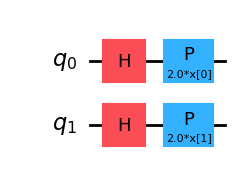

In [35]:
feature_map = PauliFeatureMap(feature_dimension=feature_dimension, reps=1, paulis=['Z'])
#feature_map = ZZFeatureMap(feature_dimension=feature_dimension, reps=1)
feature_map.decompose().draw('mpl')

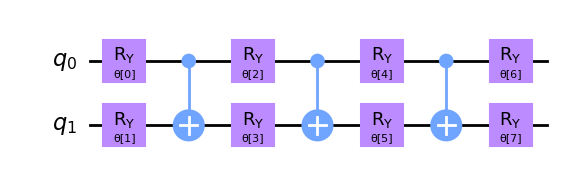

In [29]:
ansatz = RealAmplitudes(num_qubits=feature_dimension, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

In [31]:
optimizer = COBYLA(maxiter=100)
sampler = Sampler()

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer
)

Accuracy:  0.5333333333333333


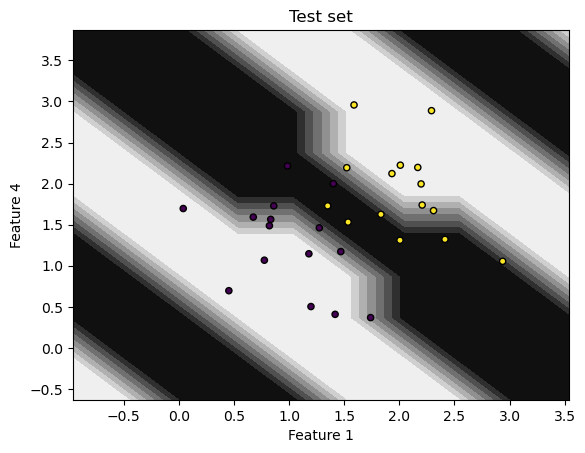

In [36]:
vqc.fit(X_train, y_train)

print('Accuracy: ', vqc.score(X_test, y_test))

#plot decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))
Z = vqc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='binary')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, edgecolor='k')
plt.xlabel(f'Feature {feature1+1}')
plt.ylabel(f'Feature {feature2+1}')
plt.title('Test set')
plt.show()